<a href="https://colab.research.google.com/github/annice6/Program-for-Data-Analytics-Project-1/blob/main/2A_2)_Linear_Regression_FINAL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project #2A-2) Linear Regression**

**Q1,2) Select datasets, Load DataFrames**

In [ ]:
#import libraries, dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
#import data from a csv file to dataframe
# source: https://www.kaggle.com/datasets/manjitbaishya001/house-prices-2023
house = pd.read_csv('/content/house_prices.csv')

In [ ]:
house  #view dataframe

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [ ]:
house.head()  #view first five of the data

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


**Q3) 4+ Data Visualizations**

In [ ]:
house.corr()

<ipython-input-5-dea6bbb23e39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house.corr()


,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
Unnamed: 0,1.000000,-0.007957,0.001672,-0.015748,0.061182
price,-0.007957,1.000000,0.496222,0.464393,0.145644
baths,0.001672,0.496222,1.000000,0.863885,0.373993
bedrooms,-0.015748,0.464393,0.863885,1.000000,0.352021
Area_in_Marla,0.061182,0.145644,0.373993,0.352021,1.000000


<ipython-input-6-c139130eea0a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr())


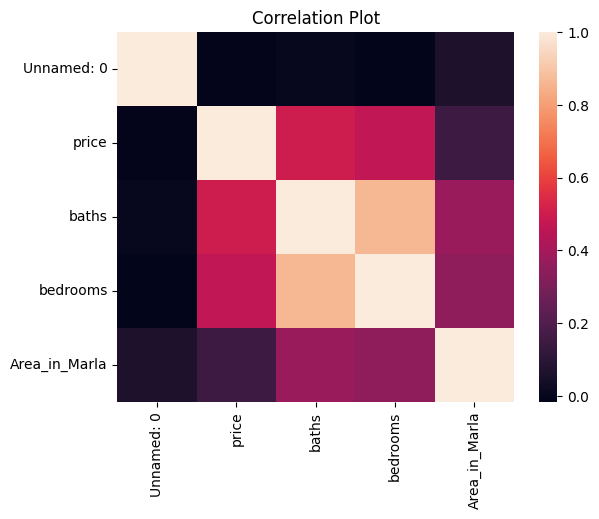

In [ ]:
# Data Visualization #1 : Correlation Matrix
#pandas has a .corr() method which returns a correlation matrix
#we will pass the correlation matrix to a seaborn heatmap method to generate the graphic

sns.heatmap(house.corr())
plt.title('Correlation Plot')
plt.show()

In [ ]:
#Use .columns to see what column we have
house.columns

Index(['Unnamed: 0', 'property_type', 'price', 'location', 'city', 'baths',
       'purpose', 'bedrooms', 'Area_in_Marla'],
      dtype='object')

In [ ]:
#see how many data in total
house.shape   #99499 rows, 9 columns

(99499, 9)

In [ ]:
#Let's learn some more about the dataset
#The object data types are categorical data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [ ]:
#Checking the number of missing values
# isnull() - tells you the number of missing values per column
house.isnull().sum()

Unnamed: 0       0
property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [ ]:
#Checking the distribution of categorical data
#distribution of the property type? & how many for each
print(house.property_type.value_counts())

House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: property_type, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(house.price.value_counts())

15000000    1727
6500000     1542
35000       1486
45000       1424
12500000    1400
            ... 
1790000        1
6169000        1
8970000        1
5499000        1
1247000        1
Name: price, Length: 1421, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(house.location.value_counts())

DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
                          ...  
Times Residency               1
CBR Town Phase 2              1
Montgomery Road               1
Sahianwala                    1
Shahra-e-Liaquat              1
Name: location, Length: 1389, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(house.city.value_counts())

Karachi       37066
Lahore        26221
Islamabad     22243
Rawalpindi    11738
Faisalabad     2231
Name: city, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(house.baths.value_counts())

3    30256
2    22660
4    17120
5    11766
6    10745
1     4215
7     2737
Name: baths, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(house.purpose.value_counts())

For Sale    70947
For Rent    28552
Name: purpose, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(house.bedrooms.value_counts())

3    34888
2    23245
4    17458
5    14355
6     6275
1     2984
0      294
Name: bedrooms, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(house.Area_in_Marla.value_counts())

5.0      12268
10.0     12267
20.0      9119
8.0       7125
4.0       4412
         ...  
14.1         1
12.6         1
150.0        1
17.7         1
74.0         1
Name: Area_in_Marla, Length: 240, dtype: int64


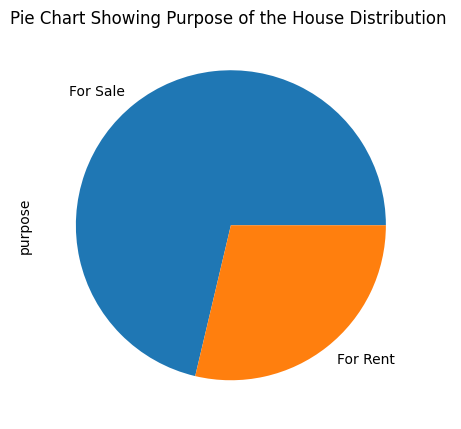

In [ ]:
# Data Visualization #2 : Pie Chart
#Plotting the distribution of the House for sale vs for rent
data = house.purpose.value_counts()
purpose_count  = house['purpose'].value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Purpose of the House Distribution ')
plt.show()

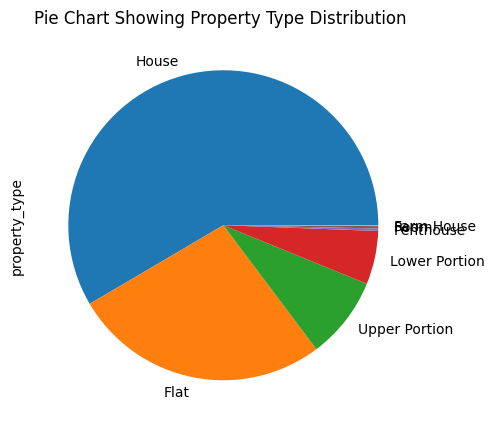

In [ ]:
# Data Visualization #3 : Pie Chart
#Plotting the distribution of the Property Types
data = house.property_type.value_counts()
property_count  = house['property_type'].value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Property Type Distribution ')
plt.show()

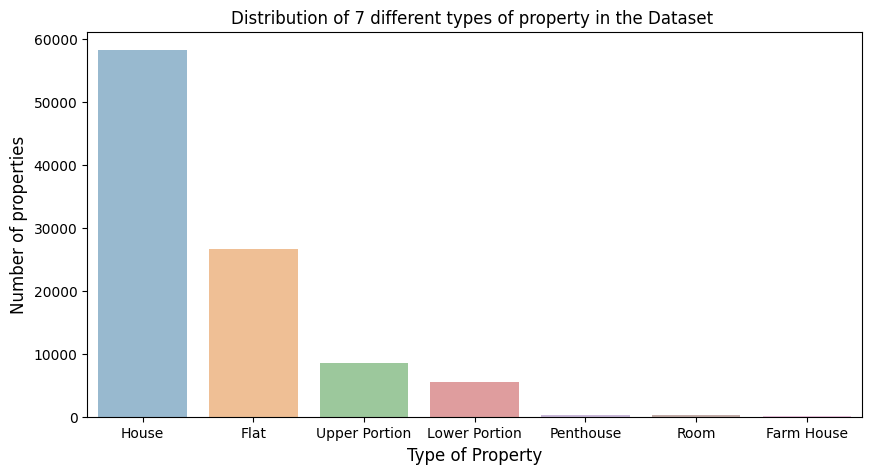

In [ ]:
# Data Visualization #4 : Bar Chart
#Plotting the distribution of the Proerpty Types to show
property_count  = house['property_type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = property_count.index, y= property_count.values,  alpha=0.5)
plt.title('Distribution of 7 different types of property in the Dataset ')
plt.ylabel('Number of properties', fontsize=12)
plt.xlabel('Type of Property', fontsize=12)
plt.show()

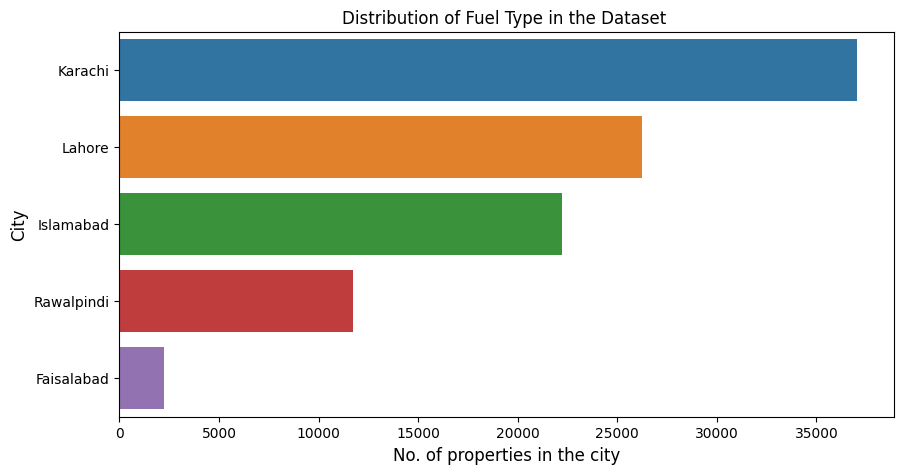

In [ ]:
# Data Visualization #5 : Bar Chart (horizontal)
#Plotting the distribution of the the properties in 5 cities
city_count  = house['city'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= city_count.values, y = city_count.index,   alpha=1, orient = 'h')
plt.title('Distribution of Fuel Type in the Dataset ')
plt.ylabel('City', fontsize=12)
plt.xlabel('No. of properties in the city', fontsize=12)
plt.show()

**Q4) Clean Datasets**

In [ ]:
#easier to see for the next step of encoding
house

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [ ]:
#property type in the house dataset
house['purpose']

0        For Sale
1        For Sale
2        For Sale
3        For Sale
4        For Sale
           ...   
99494    For Sale
99495    For Sale
99496    For Sale
99497    For Sale
99498    For Sale
Name: purpose, Length: 99499, dtype: object

In [ ]:
#encode
pd.get_dummies(house['purpose'])

,For Rent,For Sale
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
99494,0,1
99495,0,1
99496,0,1
99497,0,1


In [ ]:
purpose_encoding = pd.get_dummies(house['purpose'])

In [ ]:
#encode the property type
purpose_encoding

,For Rent,For Sale
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
99494,0,1
99495,0,1
99496,0,1
99497,0,1


In [ ]:
#Drop original purpose column since we done the encoding
house = house.drop('purpose', axis = 1)

In [ ]:
#here we see the purpose column is dropped
house

,Unnamed: 0,property_type,price,location,city,baths,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,3,5.6
2,2,House,16500000,G-15,Islamabad,6,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,3,8.0
...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,4,14.0


In [ ]:
#Joining the encoded purpose_column to the original dataframe.
# or done by concat()
house = house.join(purpose_encoding)

In [ ]:
#Here we see we add back the purpose with 2 seperate columns
house

,Unnamed: 0,property_type,price,location,city,baths,bedrooms,Area_in_Marla,For Rent,For Sale
0,0,Flat,10000000,G-10,Islamabad,2,2,4.0,0,1
1,1,Flat,6900000,E-11,Islamabad,3,3,5.6,0,1
2,2,House,16500000,G-15,Islamabad,6,5,8.0,0,1
3,3,House,43500000,Bani Gala,Islamabad,4,4,40.0,0,1
4,4,House,7000000,DHA Defence,Islamabad,3,3,8.0,0,1
...,...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,3,8.0,0,1
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,3,8.0,0,1
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,3,8.0,0,1
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,4,14.0,0,1


In [ ]:
#property type in the house dataset
house['property_type']

0         Flat
1         Flat
2        House
3        House
4        House
         ...  
99494     Flat
99495    House
99496    House
99497    House
99498    House
Name: property_type, Length: 99499, dtype: object

In [ ]:
#encode
pd.get_dummies(house['property_type'])

,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
99494,0,1,0,0,0,0,0
99495,0,0,1,0,0,0,0
99496,0,0,1,0,0,0,0
99497,0,0,1,0,0,0,0


In [ ]:
property_type_encoding = pd.get_dummies(house['property_type'])

In [ ]:
#encode the property type
property_type_encoding

,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
99494,0,1,0,0,0,0,0
99495,0,0,1,0,0,0,0
99496,0,0,1,0,0,0,0
99497,0,0,1,0,0,0,0


In [ ]:
#Drop original purpose column since we done the encoding
house = house.drop('property_type', axis = 1)

In [ ]:
#here we see the property_type column is dropped
house

,Unnamed: 0,price,location,city,baths,bedrooms,Area_in_Marla,For Rent,For Sale
0,0,10000000,G-10,Islamabad,2,2,4.0,0,1
1,1,6900000,E-11,Islamabad,3,3,5.6,0,1
2,2,16500000,G-15,Islamabad,6,5,8.0,0,1
3,3,43500000,Bani Gala,Islamabad,4,4,40.0,0,1
4,4,7000000,DHA Defence,Islamabad,3,3,8.0,0,1
...,...,...,...,...,...,...,...,...,...
99494,168435,7500000,Bahria Town Karachi,Karachi,3,3,8.0,0,1
99495,168436,8800000,Bahria Town Karachi,Karachi,4,3,8.0,0,1
99496,168438,14000000,Bahria Town Karachi,Karachi,3,3,8.0,0,1
99497,168439,14000000,Bahria Town Karachi,Karachi,4,4,14.0,0,1


In [ ]:
#Joining the encoded property_type_column to the original dataframe.
# or done by concat()
house = house.join(property_type_encoding)

In [ ]:
#Here we see we add back the purpose with 7 seperate columns
house

,Unnamed: 0,price,location,city,baths,bedrooms,Area_in_Marla,For Rent,For Sale,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,0,10000000,G-10,Islamabad,2,2,4.0,0,1,0,1,0,0,0,0,0
1,1,6900000,E-11,Islamabad,3,3,5.6,0,1,0,1,0,0,0,0,0
2,2,16500000,G-15,Islamabad,6,5,8.0,0,1,0,0,1,0,0,0,0
3,3,43500000,Bani Gala,Islamabad,4,4,40.0,0,1,0,0,1,0,0,0,0
4,4,7000000,DHA Defence,Islamabad,3,3,8.0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99494,168435,7500000,Bahria Town Karachi,Karachi,3,3,8.0,0,1,0,1,0,0,0,0,0
99495,168436,8800000,Bahria Town Karachi,Karachi,4,3,8.0,0,1,0,0,1,0,0,0,0
99496,168438,14000000,Bahria Town Karachi,Karachi,3,3,8.0,0,1,0,0,1,0,0,0,0
99497,168439,14000000,Bahria Town Karachi,Karachi,4,4,14.0,0,1,0,0,1,0,0,0,0


In [ ]:
#city in the house dataset
house['city']

0        Islamabad
1        Islamabad
2        Islamabad
3        Islamabad
4        Islamabad
           ...    
99494      Karachi
99495      Karachi
99496      Karachi
99497      Karachi
99498      Karachi
Name: city, Length: 99499, dtype: object

In [ ]:
#encode
pd.get_dummies(house['city'])

,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
99494,0,0,1,0,0
99495,0,0,1,0,0
99496,0,0,1,0,0
99497,0,0,1,0,0


In [ ]:
city_encoding = pd.get_dummies(house['city'])
#encode the city
city_encoding

,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
99494,0,0,1,0,0
99495,0,0,1,0,0
99496,0,0,1,0,0
99497,0,0,1,0,0


In [ ]:
#Drop original city column since we done the encoding
house = house.drop('city', axis = 1)

In [ ]:
#here we see the property_type column is dropped
house

,Unnamed: 0,price,location,baths,bedrooms,Area_in_Marla,For Rent,For Sale,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,0,10000000,G-10,2,2,4.0,0,1,0,1,0,0,0,0,0
1,1,6900000,E-11,3,3,5.6,0,1,0,1,0,0,0,0,0
2,2,16500000,G-15,6,5,8.0,0,1,0,0,1,0,0,0,0
3,3,43500000,Bani Gala,4,4,40.0,0,1,0,0,1,0,0,0,0
4,4,7000000,DHA Defence,3,3,8.0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99494,168435,7500000,Bahria Town Karachi,3,3,8.0,0,1,0,1,0,0,0,0,0
99495,168436,8800000,Bahria Town Karachi,4,3,8.0,0,1,0,0,1,0,0,0,0
99496,168438,14000000,Bahria Town Karachi,3,3,8.0,0,1,0,0,1,0,0,0,0
99497,168439,14000000,Bahria Town Karachi,4,4,14.0,0,1,0,0,1,0,0,0,0


In [ ]:
#Joining the encoded city_column to the original dataframe.
# or done by concat()
house = house.join(city_encoding)

In [ ]:
#Here we see we add back the city with 5 seperate columns
house

,Unnamed: 0,price,location,baths,bedrooms,Area_in_Marla,For Rent,For Sale,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
0,0,10000000,G-10,2,2,4.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,1,6900000,E-11,3,3,5.6,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,2,16500000,G-15,6,5,8.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,3,43500000,Bani Gala,4,4,40.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,4,7000000,DHA Defence,3,3,8.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99494,168435,7500000,Bahria Town Karachi,3,3,8.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
99495,168436,8800000,Bahria Town Karachi,4,3,8.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
99496,168438,14000000,Bahria Town Karachi,3,3,8.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
99497,168439,14000000,Bahria Town Karachi,4,4,14.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


**Q5) Splitting the dataset into training and test sets in the ratio 70/30**

In [ ]:
#Splitting the dataset into features and targets
#not going to include
X = house.drop(['Unnamed: 0','price','location'], axis = 1)
y = house['price']

In [ ]:
#x-axis, our features
print(X)

       baths  bedrooms  Area_in_Marla  For Rent  For Sale  Farm House  Flat  \
0          2         2            4.0         0         1           0     1   
1          3         3            5.6         0         1           0     1   
2          6         5            8.0         0         1           0     0   
3          4         4           40.0         0         1           0     0   
4          3         3            8.0         0         1           0     0   
...      ...       ...            ...       ...       ...         ...   ...   
99494      3         3            8.0         0         1           0     1   
99495      4         3            8.0         0         1           0     0   
99496      3         3            8.0         0         1           0     0   
99497      4         4           14.0         0         1           0     0   
99498      3         3            9.4         0         1           0     0   

       House  Lower Portion  Penthouse  Room  Upper

In [ ]:
#y-axis, targets
print(y)

0        10000000
1         6900000
2        16500000
3        43500000
4         7000000
           ...   
99494     7500000
99495     8800000
99496    14000000
99497    14000000
99498     9000000
Name: price, Length: 99499, dtype: int64


**Q6-9) Standardiztion, Fit model, prediction, R-squared, MAE...**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2)

In [ ]:
#Creating the model and fitting (training) on the training data
from sklearn.linear_model import LinearRegression

#Loading the Linear Regression Model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making Predictions on the test data
#Model Evaluation
#Let's test our model on our training data
y_pred = LR.predict(X_test)

In [ ]:
#Calculating the coefficients
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [  2166892.35075009    855326.6987695     271436.97052604
  -7346095.1115266    7346095.1115266  -13332228.76775373
   1221103.19569146   -231859.67226572   2220381.97758355
   1380454.84384887   7482113.74773082   1260034.67516476
  -1728256.8770055    -193651.72341488    666224.77598286
   1575354.68650002   -319670.86206249]


In [ ]:
#Calculating intercept
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -6627277.718820212


In [ ]:
#calculating R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.597430369975759


In [ ]:
#calculate Mean Sqaured Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 45819323906316.69


In [ ]:
#Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 6768997.260031702


In [ ]:
#calculae Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 5117352.186368063


In [ ]:
y_pred

array([ 8587573.52516306, 12391335.40919057, 11943280.46707755, ...,
       12078998.95234057, 11577024.49761246,  7297043.00785995])

In [ ]:
#Export the model as pickle
# f = final
import pickle
with open('house_price_regression_model.pkl','wb') as f:
  pickle.dump(LR,f)

# **Extra Notes**

In [ ]:
#loading our dataset - source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

#loading the dataset into a pandas dataframe
cars = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/car%20data.csv')

In [ ]:
#pandas has a .corr() method which returns a correlation matrix
#we will pass the correlation matrix to a seaborn heatmap method to generate the graphic

sns.heatmap(cars.corr())
plt.title('Correlation Plot')
plt.show()